In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
from pathlib import Path
from torchvision.transforms import (
    Compose, 
    RandomCrop, 
)

from src.data.transforms import Shrink, CenterCropPct, PadCenterCrop

In [10]:
shrink_preview_scale = 8
img_mean = (238, 231, 234)  # from all train data
img_size = 1536

In [11]:
pre_transform = Compose(
    [
        CenterCropPct(size=(0.9, 0.9)),
        Shrink(scale=shrink_preview_scale, fill=img_mean),
    ]
)
train_transform = Compose(
    [
        pre_transform,
        RandomCrop(
            size=(img_size, img_size),
            pad_if_needed=True,
            padding_mode='constant',
            fill=img_mean
        )
    ]
)
val_transform = Compose(
    [
        pre_transform,
        PadCenterCrop(
            size=(img_size, img_size),
            pad_if_needed=True,
            padding_mode='constant',
            fill=img_mean
        )
    ]
)

In [ ]:
data_dir = Path('/workspace/data/images_page_4/')
filenames = sorted(list(data_dir.glob('**/*.png')))

[1085, 793, 1184]


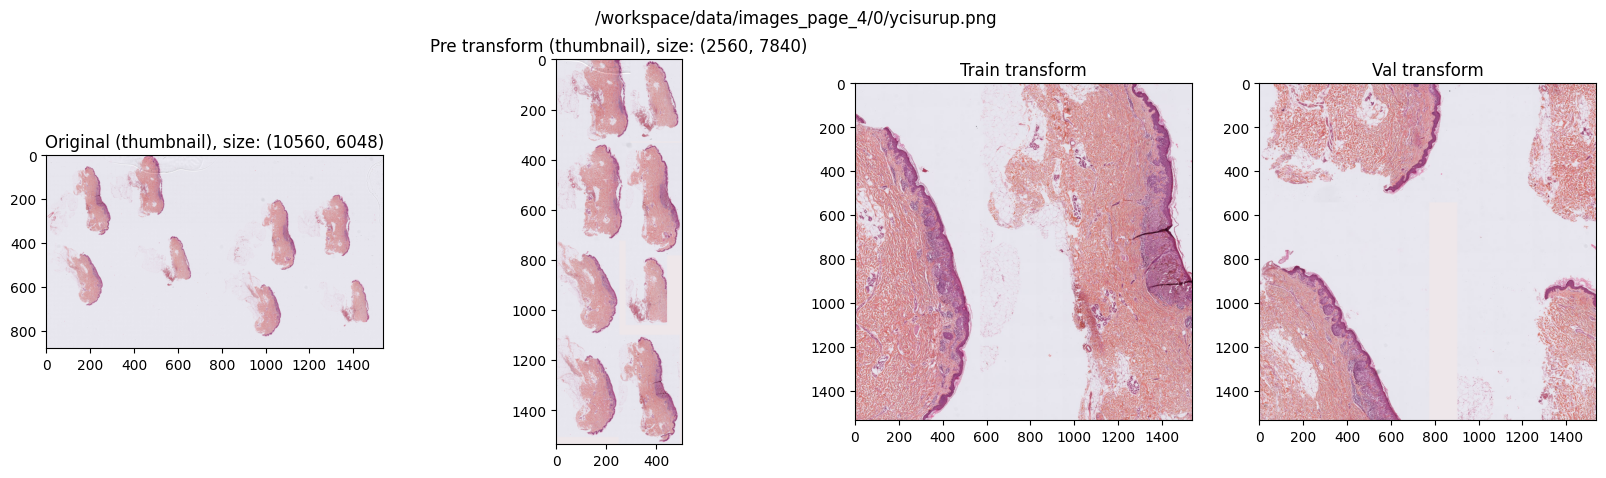

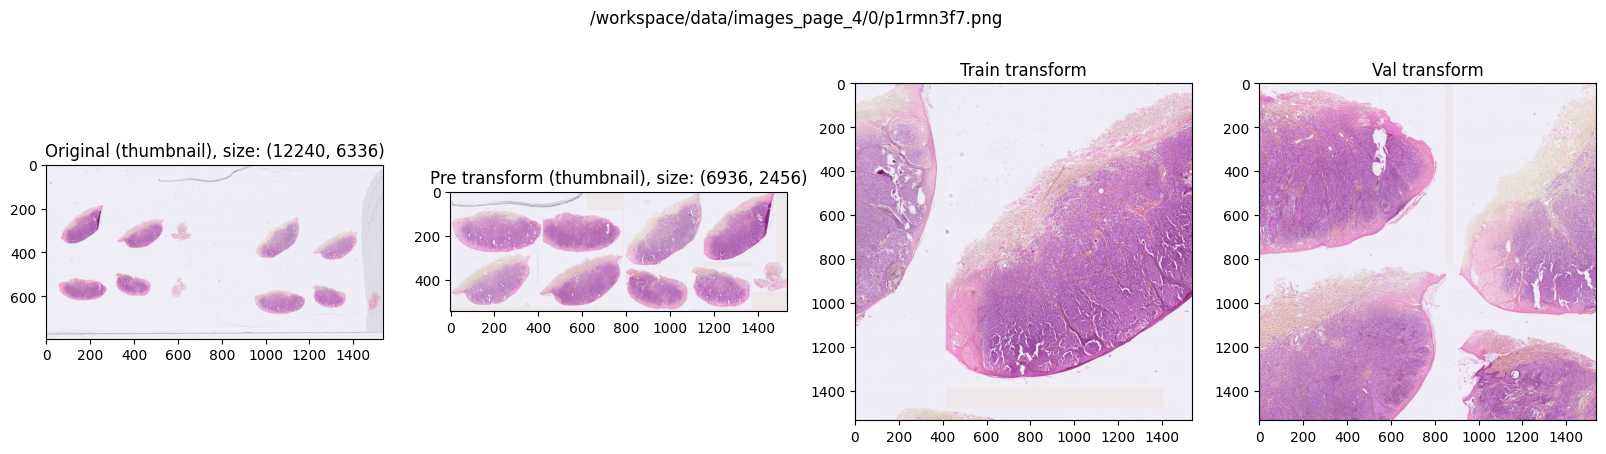

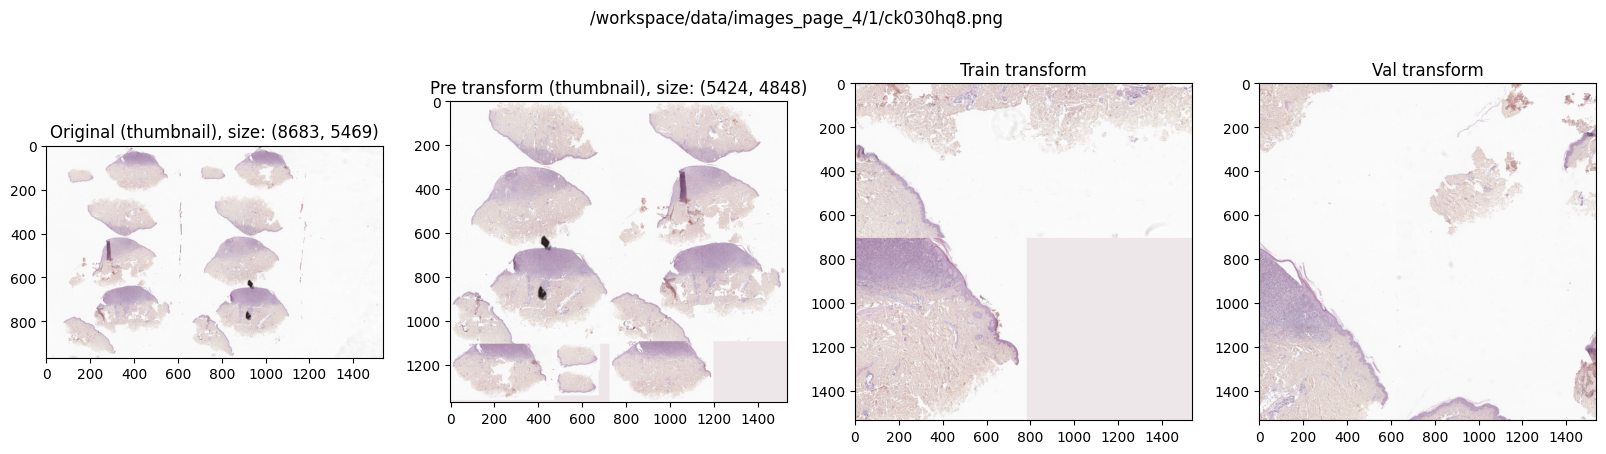

In [24]:
# indices = np.random.choice(len(filenames), 3, replace=False)
indices = [1085,  793, 1184]
print(indices)

for index in indices:
    # Plot 4 panels: 
    # - original (resized keeping aspect), 
    # - after pre_transform, 
    # - after train_transform, 
    # - after val_transform
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes = axes.flatten()
    img = Image.open(filenames[index])
    img_resized = img.copy()
    img_resized.thumbnail([img_size, img_size], Image.LANCZOS)
    img_pretransform = pre_transform(img)
    img_pretransform_resized = img_pretransform.copy()
    img_pretransform_resized.thumbnail([img_size, img_size], Image.LANCZOS)
    fig.suptitle(filenames[index])
    axes[0].imshow(img_resized)
    axes[0].set_title(f'Original (thumbnail), size: {img.size}')
    axes[1].imshow(img_pretransform_resized)
    axes[1].set_title(f'Pre transform (thumbnail), size: {img_pretransform.size}')
    axes[2].imshow(train_transform(img))
    axes[2].set_title('Train transform')
    axes[3].imshow(val_transform(img))
    axes[3].set_title('Val transform')